In [1]:
import sys
sys.path.append("../")

import os
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import argparse
from wldo_regressor.model import Model
from dataset_dogs.base_dataset import BaseDataset
from global_utils.helpers.visualize import Visualizer
import global_utils.config0 as config0
from torch.utils.data import DataLoader

c:\Users\CHAMP-3000\anaconda3\envs\wldo\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Define command-line arguments
parser = argparse.ArgumentParser()
parser.add_argument('--output_dir', default='../data/results', help='Where to export the SMAL fits')
# parser.add_argument('--checkpoint', default='../data/pretrained/model_epoch_00000999.pth', help='Path to network checkpoint')
parser.add_argument('--checkpoint', default='../data/pretrained/3501_00034_betas_v4.pth', help='Path to network checkpoint')
parser.add_argument('--dataset', default='stanford', choices=['stanford', 'animal_pose'], help='Choose evaluation dataset')
parser.add_argument('--log_freq', default=50, type=int, help='Frequency of printing intermediate results')
parser.add_argument('--batch_size', default=32, type=int, help='Batch size for testing')
parser.add_argument('--num_workers', default=0, type=int, help='Number of processes for data loading')
parser.add_argument('--shape_family_id', default=-1, type=int, help='Shape family to use')
parser.add_argument('--gpu_ids', default="0", type=str, help='GPUs to use. Format as string, e.g. "0,1,2')
parser.add_argument('--param_dir', default="NONE", type=str, help='Exported parameter folder to load')
args = parser.parse_args(args=[])

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
model = Model(device, 1, None)

c:\Users\CHAMP-3000\anaconda3\envs\wldo\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading SMAL with shape family: 1
INITIALIZED


In [5]:
dataset = BaseDataset(
            args.dataset,
            is_train=True, 
            use_augmentation=False)
    

In [6]:
data_loader = DataLoader(
        dataset, 
        batch_size=args.batch_size, 
        shuffle=False, 
        num_workers=args.num_workers)

In [7]:
model.train()
for step, batch in enumerate(data_loader):
    print("done")
    preds = model(batch)
    if step > 3:
        break

done
done
done
done
done


In [31]:
img = batch['img']
keypoints = batch['keypoints']
seg=batch['seg']
index=batch['index']
has_seg=batch['has_seg']
dataset=batch['dataset']
img_orig=batch['img_orig']
scale=batch['scale']
img_border_mask=batch['img_border_mask']
center = batch['center']


In [11]:
import matplotlib.pyplot as plt

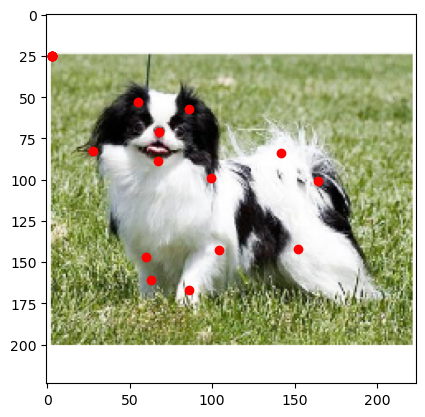

In [45]:
idx = 12
plt.imshow(img_orig.permute(0,2,3,1).cpu().numpy()[idx])

kpts = keypoints.cpu().numpy()[idx]*112
x = 112 + kpts[:,0]
y = 112 + kpts[:,1]
plt.scatter(x, y, color="red")

plt.show()

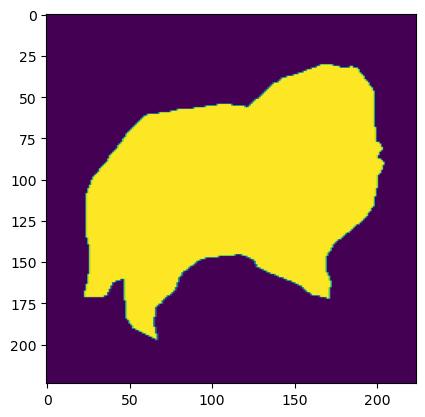

In [24]:
plt.imshow(seg.permute(0,2,3,1).cpu().numpy()[4])
plt.show()

In [32]:
center

tensor([[228.0000, 246.0000],
        [ 96.5000,  81.0000],
        [148.5000, 171.5000],
        [199.5000, 191.0000],
        [ 95.5000,  86.0000],
        [129.0000,  99.5000],
        [283.0000, 249.0000],
        [113.5000,  79.5000],
        [113.0000, 191.0000],
        [207.5000, 234.5000],
        [310.5000, 217.5000],
        [287.0000, 200.5000],
        [199.5000, 159.5000],
        [ 70.5000,  88.5000],
        [408.5000, 318.5000],
        [204.5000, 209.0000],
        [103.0000, 152.5000],
        [ 87.5000,  92.5000],
        [155.0000, 120.0000],
        [134.0000, 126.5000],
        [210.5000, 144.5000],
        [340.5000, 135.0000],
        [ 91.0000,  67.5000],
        [207.5000, 141.5000],
        [181.0000, 214.0000],
        [150.5000, 132.0000],
        [175.0000, 134.5000],
        [126.5000, 105.5000],
        [ 77.0000,  84.0000],
        [164.0000, 139.5000],
        [ 99.0000,  77.5000],
        [183.0000, 173.5000]])